## Fama-French (Five Factors)
$E(r_i)-r_f = \alpha + \beta_{mkt}MKT + \beta_{smb}SMB + \beta_{hml}HML + \beta_{rmw}RMW + \beta_{cma}CMA$

In [1]:
import yfinance as yf 
import numpy as np 
import pandas_datareader.data as web 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
from pandas_datareader.famafrench import get_available_datasets

plt.style.use('bmh')

In [2]:
factors_list = get_available_datasets()
for factor in factors_list:
    if 'F-F' in factor: print(factor)

F-F_Research_Data_Factors
F-F_Research_Data_Factors_weekly
F-F_Research_Data_Factors_daily
F-F_Research_Data_5_Factors_2x3
F-F_Research_Data_5_Factors_2x3_daily
F-F_Momentum_Factor
F-F_Momentum_Factor_daily
F-F_ST_Reversal_Factor
F-F_ST_Reversal_Factor_daily
F-F_LT_Reversal_Factor
F-F_LT_Reversal_Factor_daily


In [3]:
data = yf.download('SPY', period='10y', interval='1d', auto_adjust=True, progress=False)
data = data.Close.resample('M').last().iloc[:-1]
data = np.log(data/data.shift(1))
data.dropna(inplace=True)
data

Date
2012-03-31    0.031658
2012-04-30   -0.006698
2012-05-31   -0.061935
2012-06-30    0.039779
2012-07-31    0.011760
                ...   
2021-09-30   -0.047726
2021-10-31    0.067811
2021-11-30   -0.008067
2021-12-31    0.045210
2022-01-31   -0.054183
Freq: M, Name: Close, Length: 119, dtype: float64

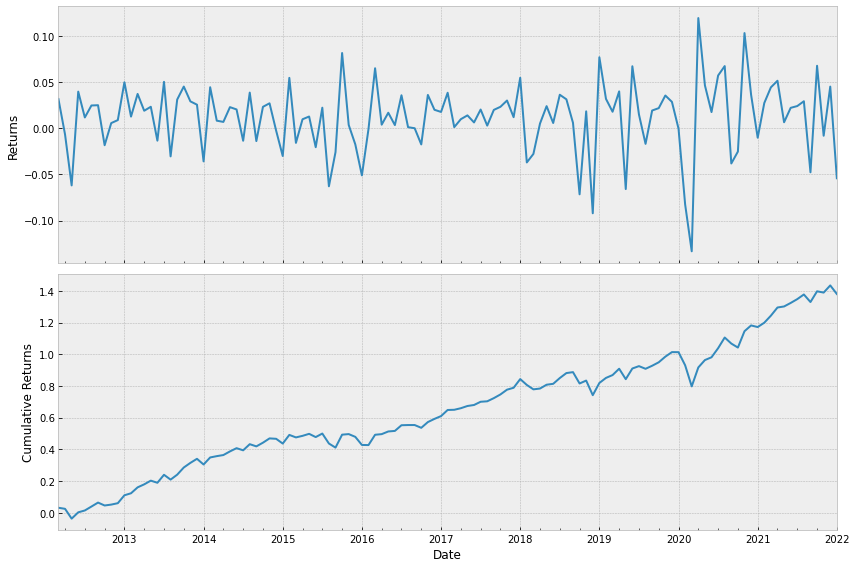

In [4]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

data.plot(ax=ax[0], ylabel='Returns')
data.cumsum().plot(ax=ax[1], ylabel='Cumulative Returns')

plt.tight_layout()
plt.show()

In [5]:
ff_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench',
                            start=data.index[0], end=data.index[-1])[0]
ff_factors = ff_factors.div(100)
ff_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2012-03,0.0311,-0.0049,0.0112,-0.0055,0.0069,0.0000
2012-04,-0.0085,-0.0054,-0.0077,0.0131,0.0069,0.0000
2012-05,-0.0619,-0.0010,-0.0106,0.0210,0.0234,0.0001
2012-06,0.0389,0.0081,0.0059,-0.0107,0.0044,0.0000
2012-07,0.0079,-0.0276,-0.0012,0.0113,0.0003,0.0000
...,...,...,...,...,...,...
2021-08,0.0290,-0.0079,-0.0013,-0.0026,-0.0167,0.0000
2021-09,-0.0437,0.0125,0.0509,-0.0194,0.0208,0.0000
2021-10,0.0665,-0.0269,-0.0044,0.0174,-0.0148,0.0000


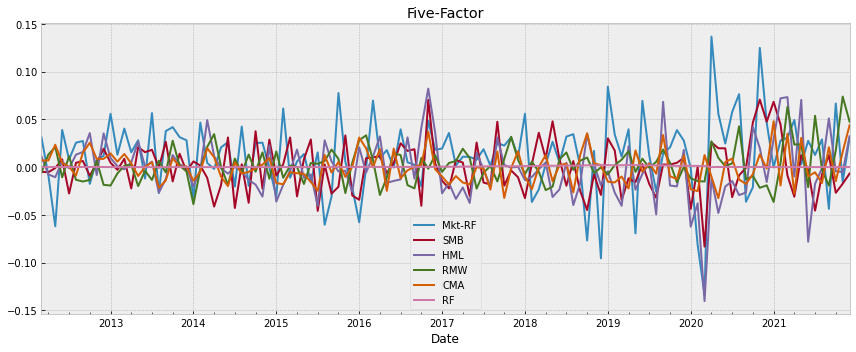

In [6]:
ff_factors.plot(figsize=(12,5), title='Five-Factor')
plt.tight_layout()
plt.show()

In [7]:
ff_factors.index = ff_factors.index.format()
data.index = data.index.strftime('%Y-%m')
datas = ff_factors.join(data , how='inner')

In [8]:
datas.rename(columns={'Close':'returns', 'Mkt-RF':'MKT'}, inplace=True)
datas['excessReturns'] = datas['returns'] - datas['RF']
datas.columns = [col.strip() for col in datas.columns]

In [9]:
datas

,MKT,SMB,HML,RMW,CMA,RF,returns,excessReturns
2012-03,0.0311,-0.0049,0.0112,-0.0055,0.0069,0.0000,0.031658,0.031658
2012-04,-0.0085,-0.0054,-0.0077,0.0131,0.0069,0.0000,-0.006698,-0.006698
2012-05,-0.0619,-0.0010,-0.0106,0.0210,0.0234,0.0001,-0.061935,-0.062035
2012-06,0.0389,0.0081,0.0059,-0.0107,0.0044,0.0000,0.039779,0.039779
2012-07,0.0079,-0.0276,-0.0012,0.0113,0.0003,0.0000,0.011760,0.011760
...,...,...,...,...,...,...,...,...
2021-08,0.0290,-0.0079,-0.0013,-0.0026,-0.0167,0.0000,0.029326,0.029326
2021-09,-0.0437,0.0125,0.0509,-0.0194,0.0208,0.0000,-0.047726,-0.047726
2021-10,0.0665,-0.0269,-0.0044,0.0174,-0.0148,0.0000,0.067811,0.067811
2021-11,-0.0155,-0.0174,-0.0053,0.0738,0.0160,0.0000,-0.008067,-0.008067


In [10]:
model = smf.ols(formula='excessReturns ~ MKT + SMB + HML + RMW + CMA', data=datas).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          excessReturns   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3676.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          2.06e-122
Time:                        14:23:56   Log-Likelihood:                 520.84
No. Observations:                 118   AIC:                            -1030.
Df Residuals:                     112   BIC:                            -1013.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.000     -2.177      0.0